In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/sharmapratik88/AIML-Projects/refs/heads/master/05_Feature%20Engineering%20Techniques/concrete%20(1).csv')

In [3]:
df = data.copy(deep = True)
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isna().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [6]:
df.isnull().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.slag = df.slag.replace(to_replace = 0, value = df.slag.mean())
df.ash = df.ash.replace(to_replace = 0, value = df.ash.mean())
df.superplastic = df.superplastic.replace(to_replace = 0, value = df.superplastic.mean())

In [9]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,107.687023,83.965637,181.567282,8.487734,972.918932,773.580485,45.662136,35.817961
std,104.506364,61.658049,39.911375,21.354219,4.036065,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,73.895825,54.188350,164.900000,6.204660,932.000000,730.950000,7.000000,23.710000
50%,272.900000,73.895825,54.188350,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


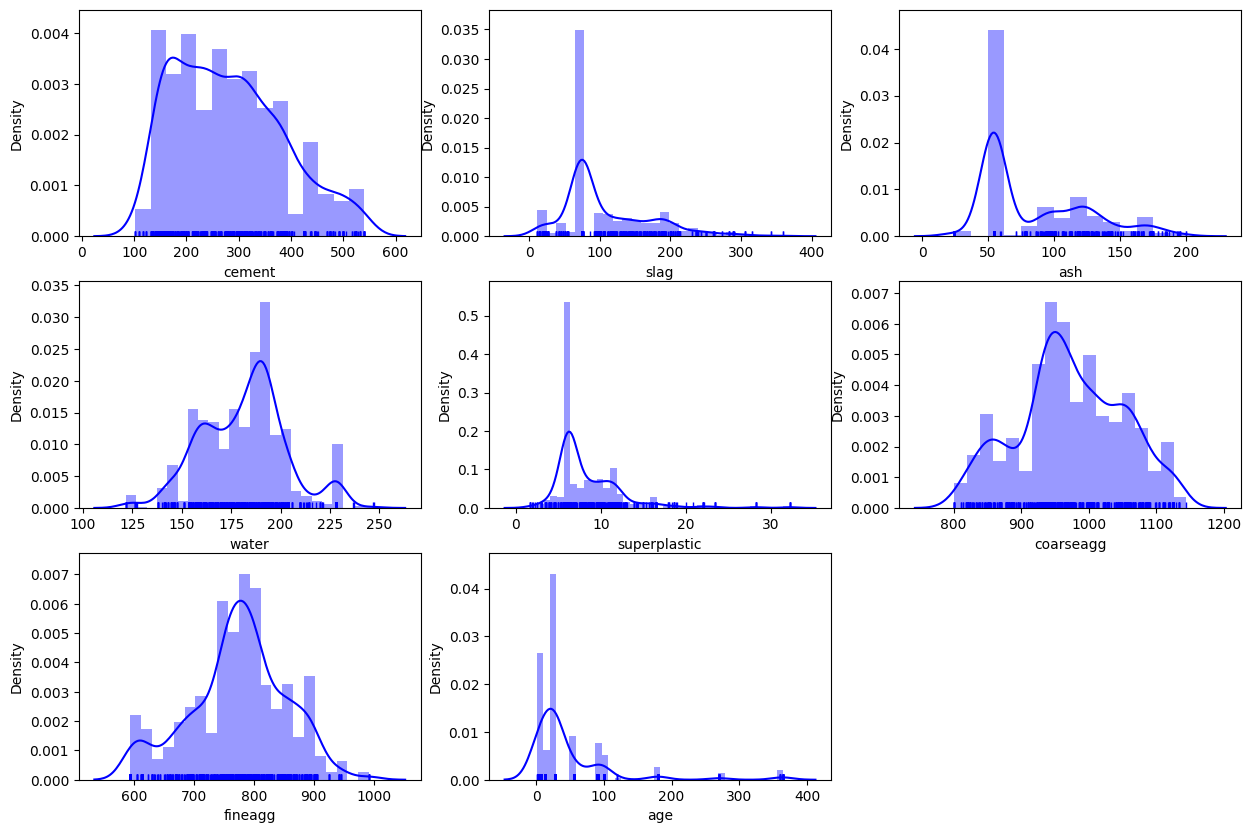

In [10]:
plt.figure(figsize=(15,10))
col = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1

In [11]:
def age_bin(df):
  if df['age'] <= 30:
    return '1 month'
  if df['age'] > 30 and df['age'] <= 60:
    return '2 months'
  if df['age'] > 60 and df['age'] <= 90:
    return '3 months'
  if df['age'] > 90 and df['age'] <= 120:
    return '4 months'
  if df['age'] > 120 and df['age'] <= 150:
    return '5 months'
  if df['age'] > 150 and df['age'] <= 180:
    return '6 months'
  if df['age'] > 180 and df['age'] <= 210:
    return '7 months'
  if df['age'] > 210 and df['age'] <= 240:
    return '8 months'
  if df['age'] > 240 and df['age'] <= 270:
    return '9 months'
  if df['age'] > 270 and df['age'] <= 300:
    return '10 months'
  if df['age'] > 300 and df['age'] <= 330:
    return '11 months'
  if df['age'] >= 330:
    return '12 months'
df['age_in_months'] = df.apply(lambda df: age_bin(df), axis = 1)

age_in_months
1 month      749
2 months      91
4 months      77
3 months      54
6 months      26
12 months     20
9 months      13
Name: count, dtype: int64


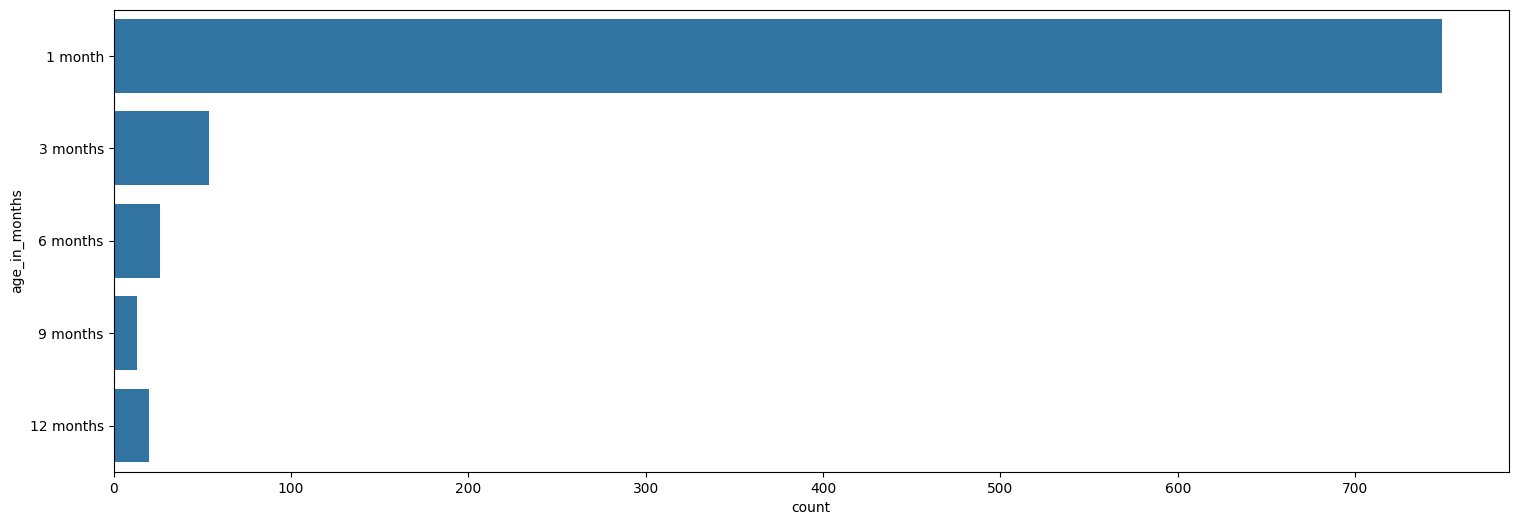

In [12]:
plt.figure(figsize  = (18,6))
sns.countplot(df['age_in_months'], order = ['1 month', '3 months', '6 months', '9 months', '12 months'])
print(df['age_in_months'].value_counts())

In [13]:
df.drop(columns = 'age_in_months', inplace = True)

Skewness of Strength:  0.41697728841071807


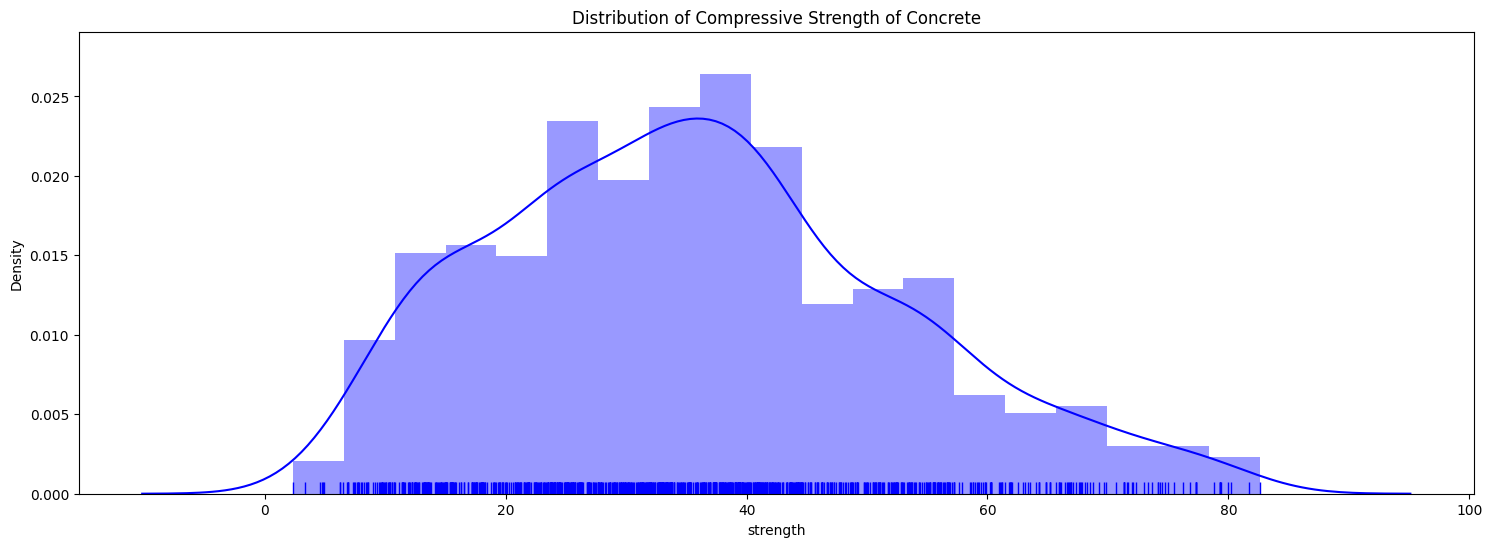

In [14]:
plt.figure(figsize = (18,6))
sns.distplot(df['strength'], rug = 'True', color = 'b')
plt.title('Distribution of Compressive Strength of Concrete')
print('Skewness of Strength: ', df['strength'].skew())

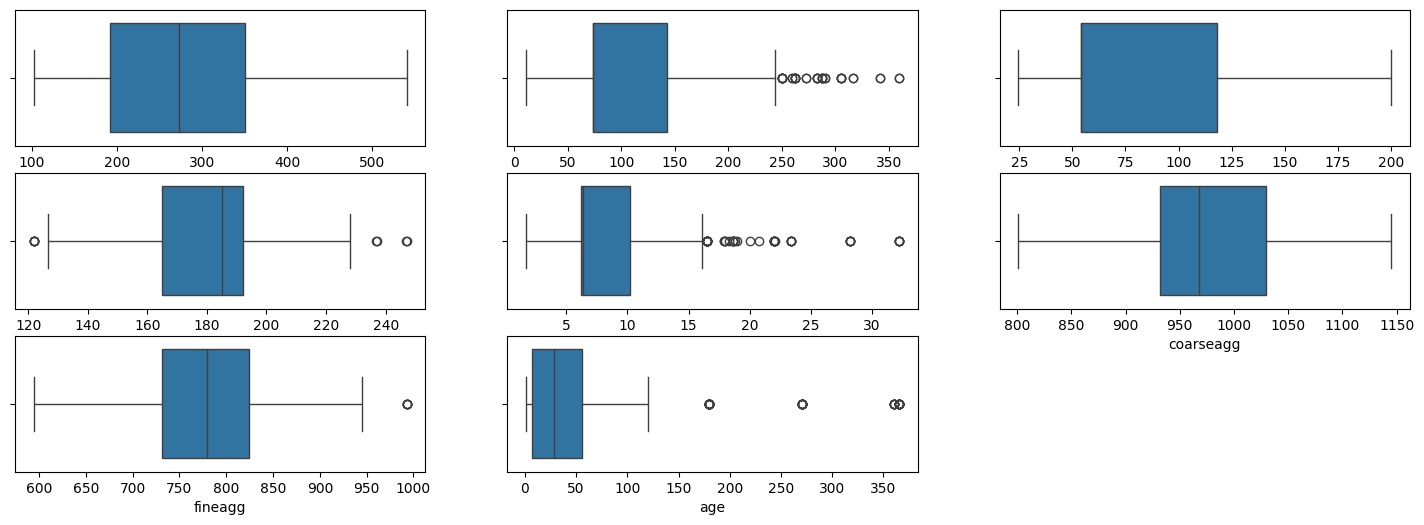

In [15]:
plt.figure(figsize = (18,6))
col = 1
for i in df.drop(columns = 'strength').columns:
  plt.subplot(3,3,col)
  sns.boxplot(df[i], orient = 'h')
  col += 1